In [63]:
import pandas as pd
import os
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#files reading
olist_orders_dataset=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-f-denisenko-21/first_project/olist_orders_dataset.csv")
olist_orders_dataset.order_id.nunique()

99441

In [25]:
#files reading
olist_customers_dataset=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-f-denisenko-21/first_project/olist_customers_dataset.csv")
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [26]:
#files reading
olist_order_items_dataset=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-f-denisenko-21/first_project/olist_order_items_dataset.csv")
olist_order_items_dataset
olist_order_items_dataset.order_id.nunique()

98666

In [27]:
#finding the sum for each order
sum=olist_order_items_dataset.groupby('order_id', as_index=False).agg({'price':'sum'})
sum=sum.rename(columns={'price':'Total_sum'})
sum

,order_id,Total_sum
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [28]:
customers_and_orders=olist_customers_dataset.merge(olist_orders_dataset,on='customer_id')
customers_and_orders
#mearging customers and order information into one table

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [29]:
import numpy as np
Search_NAN=pd.isna(customers_and_orders.order_approved_at)
customers_and_orders['NaN_in']=Search_NAN
only_purchers=customers_and_orders.query('NaN_in==False')
only_purchers
#table was created with flag of payment happend or not
#in the column "NaN_in" value "False" shows payment happend
#Table "only_purchers" has only purchases

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,NaN_in
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,False
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,False
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,False
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,False


In [30]:
only_purchers=only_purchers.drop_duplicates()
only_purchers
#deleting the repeated values

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,NaN_in
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,False
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,False
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,False
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,False
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,False
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,False
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,False


In [31]:
all_data=sum.merge(only_purchers,on='order_id', how='left')
all_data
#merging sum of each order with "only_purchases"

,order_id,Total_sum,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,NaN_in
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,False
1,00018f77f2f0320c557190d7a144bdd3,239.90,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,False
2,000229ec398224ef6ca0657da4fc703e,199.00,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,False
3,00024acbcdf0a6daa1e931b038114c75,12.99,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077.0,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,False
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690.0,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,False
98663,fffce4705a9662cd70adb13d4a31832d,99.90,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039.0,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,False
98664,fffe18544ffabc95dfada21779c9644f,55.99,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289.0,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,False


In [32]:
#changing the data type 
data=pd.DataFrame()
data['Date_of_purches']=all_data.order_approved_at
data['Date_of_purches']=data.Date_of_purches.apply(pd.to_datetime)
data

,Date_of_purches
0,2017-09-13 09:45:35
1,2017-04-26 11:05:13
2,2018-01-14 14:48:30
3,2018-08-08 10:10:18
4,2017-02-04 14:10:13
...,...
98661,2018-04-25 04:11:01
98662,2018-07-17 04:31:48
98663,2017-10-24 17:14:25
98664,2017-08-15 00:04:32


In [33]:
#making table with needed information
data['order_id']=all_data.order_id
data['Total_sum']=all_data.Total_sum
data['customer_unique_id']=all_data.customer_unique_id
data

,Date_of_purches,order_id,Total_sum,customer_unique_id
0,2017-09-13 09:45:35,00010242fe8c5a6d1ba2dd792cb16214,58.90,871766c5855e863f6eccc05f988b23cb
1,2017-04-26 11:05:13,00018f77f2f0320c557190d7a144bdd3,239.90,eb28e67c4c0b83846050ddfb8a35d051
2,2018-01-14 14:48:30,000229ec398224ef6ca0657da4fc703e,199.00,3818d81c6709e39d06b2738a8d3a2474
3,2018-08-08 10:10:18,00024acbcdf0a6daa1e931b038114c75,12.99,af861d436cfc08b2c2ddefd0ba074622
4,2017-02-04 14:10:13,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,64b576fb70d441e8f1b2d7d446e483c5
...,...,...,...,...
98661,2018-04-25 04:11:01,fffc94f6ce00a00581880bf54a75a037,299.99,0c9aeda10a71f369396d0c04dce13a64
98662,2018-07-17 04:31:48,fffcd46ef2263f404302a634eb57f7eb,350.00,0da9fe112eae0c74d3ba1fe16de0988b
98663,2017-10-24 17:14:25,fffce4705a9662cd70adb13d4a31832d,99.90,cd79b407828f02fdbba457111c38e4c4
98664,2017-08-15 00:04:32,fffe18544ffabc95dfada21779c9644f,55.99,eb803377c9315b564bdedad672039306


In [34]:
NOW = data['Date_of_purches'].max()
NOW
#Let's use the current date like a last date from all purchases.
#IUsing today date will add a lot of unuseful information.

Timestamp('2018-09-03 17:40:06')

In [35]:
start_date=data['Date_of_purches'].min()
start_date
#date of first purchase

Timestamp('2016-09-15 12:16:38')

In [37]:
data['DaysSincePurche']=data.Date_of_purches.apply(lambda x: (NOW-x).days)
data
#creating the column with the days between purchase and NOW-date

,Date_of_purches,order_id,Total_sum,customer_unique_id,DaysSincePurche
0,2017-09-13 09:45:35,00010242fe8c5a6d1ba2dd792cb16214,58.90,871766c5855e863f6eccc05f988b23cb,355.0
1,2017-04-26 11:05:13,00018f77f2f0320c557190d7a144bdd3,239.90,eb28e67c4c0b83846050ddfb8a35d051,495.0
2,2018-01-14 14:48:30,000229ec398224ef6ca0657da4fc703e,199.00,3818d81c6709e39d06b2738a8d3a2474,232.0
3,2018-08-08 10:10:18,00024acbcdf0a6daa1e931b038114c75,12.99,af861d436cfc08b2c2ddefd0ba074622,26.0
4,2017-02-04 14:10:13,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,64b576fb70d441e8f1b2d7d446e483c5,576.0
...,...,...,...,...,...
98661,2018-04-25 04:11:01,fffc94f6ce00a00581880bf54a75a037,299.99,0c9aeda10a71f369396d0c04dce13a64,131.0
98662,2018-07-17 04:31:48,fffcd46ef2263f404302a634eb57f7eb,350.00,0da9fe112eae0c74d3ba1fe16de0988b,48.0
98663,2017-10-24 17:14:25,fffce4705a9662cd70adb13d4a31832d,99.90,cd79b407828f02fdbba457111c38e4c4,314.0
98664,2017-08-15 00:04:32,fffe18544ffabc95dfada21779c9644f,55.99,eb803377c9315b564bdedad672039306,384.0


In [38]:
#найдем минимум столбца DaysSincePurche для нахождения значения недавности
#finding the minimum in 'DaysSincePurche' to find the value of recency
aggr = {
    'DaysSincePurche': lambda x: x.min(), 
# amount of days after the last order (Recency)
    'Date_of_purches': lambda x:\
    len([d for d in x if d >= start_date]),
#all purchases quantity at all time from start of sales
#to not include zero values, if it is
       }
RF = data.groupby('customer_unique_id').agg(aggr).reset_index()
RF.rename(columns={'DaysSincePurche': 'Recency',\
                    'Date_of_purches': 'Frequency'}, inplace=True)
RF

,customer_unique_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1
2,0000f46a3911fa3c0805444483337064,541.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1
4,0004aac84e0df4da2b147fca70cf8255,292.0,1
...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1
95403,fffea47cd6d3cc0a88bd621562a9d061,266.0,1
95404,ffff371b4d645b6ecea244b27531430a,573.0,1
95405,ffff5962728ec6157033ef9805bacc48,124.0,1


In [39]:
Monetary=data.groupby('customer_unique_id', as_index=False).agg({'Total_sum':'sum'})
RFM=RF.merge(Monetary, on='customer_unique_id')
RFM.rename(columns={'Total_sum': 'Monetary'}, inplace=True)
RFM
#Getting the data for recency, frequency and monetery for each user

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,573.0,1,89.90
95405,ffff5962728ec6157033ef9805bacc48,124.0,1,115.00


In [40]:
quintiles = RFM[['Recency', 'Frequency', 'Monetary']]\
    .quantile([.2, .4, .6, .8]).to_dict()
quintiles
#getting the quintiles 

{'Recency': {0.2: 97.0, 0.4: 181.0, 0.6: 272.0, 0.8: 388.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [41]:
RFM.max()

customer_unique_id    ffffd2657e2aad2907e67c3e9daecbeb
Recency                                            718
Frequency                                           16
Monetary                                         13440
dtype: object

In [42]:
# function for definition quintiles for Recency
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
# function for definition quintiles for Frequency и Monetary

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [43]:
#getting the column with all RFM metric
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5,215
...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00,1,1,5,115
95403,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89,3,1,2,312
95404,ffff371b4d645b6ecea244b27531430a,573.0,1,89.90,1,1,3,113
95405,ffff5962728ec6157033ef9805bacc48,124.0,1,115.00,4,1,4,414


In [47]:
#Matching the names of segments with numbers
segt_map = {
    r'[1-2][5][5]': 'Premium',
    r'[3-5][5][5]': 'Former_Premium',
    r'[1-5][5][1-4]': 'Loyal customers',
    r'[1-5][2-4][1-5]': 'NaN',
    r'[1][1][1-2]': 'New_econom',
    r'[5][1][1-5]': 'Disposable',
    r'[1-2][1][3-5]': 'New_middle',
    r'[2][1][1-2]': 'New_middle',
    r'[3-4][1][1-5]': 'Need_to_return',
            }

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)+ RFM['M'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4,414,Need_to_return
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411,Need_to_return
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112,New_econom
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211,New_middle
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5,215,New_middle
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00,1,1,5,115,New_middle
95403,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89,3,1,2,312,Need_to_return
95404,ffff371b4d645b6ecea244b27531430a,573.0,1,89.90,1,1,3,113,New_middle
95405,ffff5962728ec6157033ef9805bacc48,124.0,1,115.00,4,1,4,414,Need_to_return


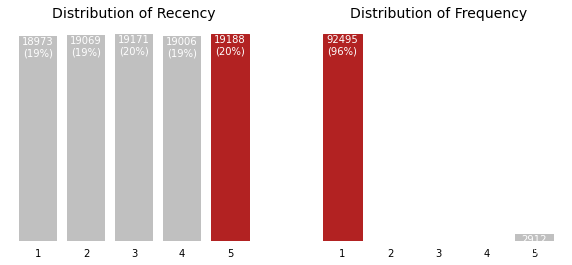

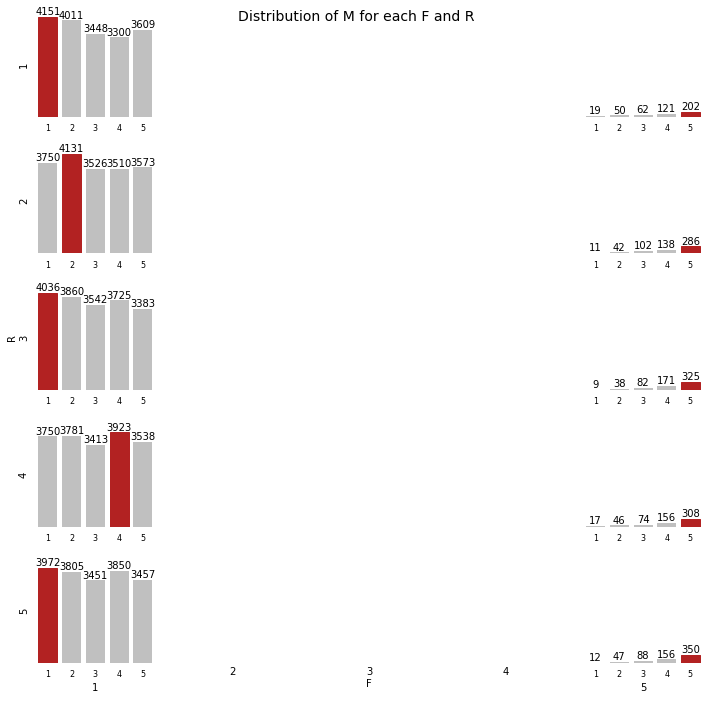

In [49]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['R'] == r) & (RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [50]:
RFM
#it need to find mean value of RFM for each segment

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116.0,1,129.90,4,1,4,414,Need_to_return
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,4,1,1,411,Need_to_return
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,1,1,2,112,New_econom
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,2,1,1,211,New_middle
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,2,1,5,215,New_middle
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,1570.00,1,1,5,115,New_middle
95403,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,64.89,3,1,2,312,Need_to_return
95404,ffff371b4d645b6ecea244b27531430a,573.0,1,89.90,1,1,3,113,New_middle
95405,ffff5962728ec6157033ef9805bacc48,124.0,1,115.00,4,1,4,414,Need_to_return


In [59]:
R_mean=RFM.groupby("Segment",as_index=False).agg({'R':'mean'}).sort_values('R')

In [60]:
M_mean=RFM.groupby("Segment",as_index=False).agg({'M':'mean'}).sort_values('M')

In [58]:
F_mean=RFM.groupby("Segment",as_index=False).agg({'F':'mean'}).sort_values('F')

Text(0.5, 1.0, 'Mean values for R of  segments')

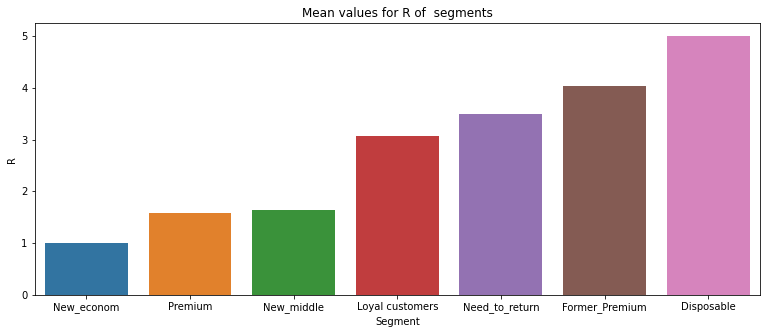

In [93]:
plt.figure(figsize=(13,5))
ax1=sns.barplot(x="Segment", y="R", data=R_mean)
ax1.set_title('Mean values for R of  segments')

Text(0.5, 1.0, 'Mean values for M of  segments')

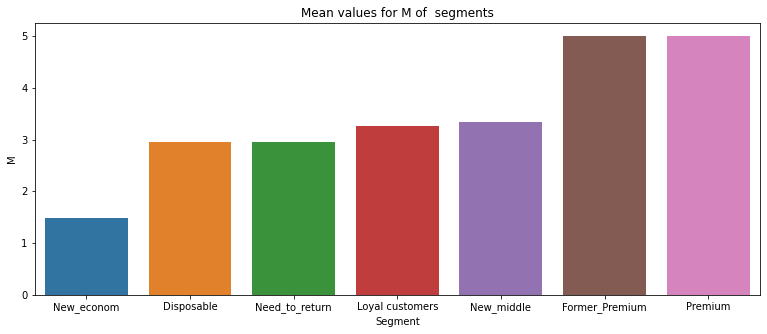

In [91]:
plt.figure(figsize=(13,5))
ax2=sns.barplot(x="Segment", y="M", data=M_mean)
ax2.set_title('Mean values for M of  segments')

Text(0.5, 1.0, 'Mean values for F of  segments')

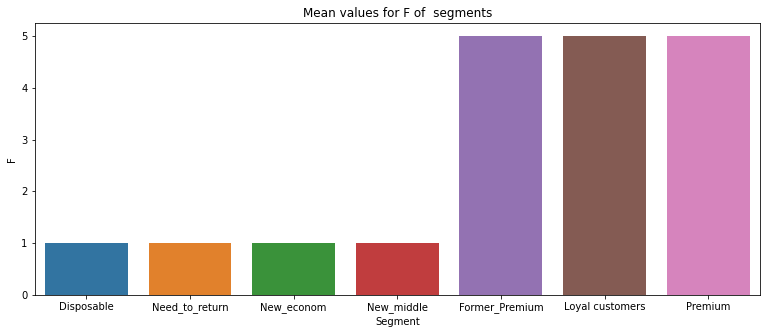

In [89]:

plt.figure(figsize=(13,5))
ax3=sns.barplot(x="Segment", y="F", data=F_mean)
ax3.set_title('Mean values for F of  segments')